In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

In [3]:
df = pd.read_csv("radiomics_features.csv")
df.head()

,ID,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,benign (1),3.1.1.dev111+g8ed579383,2.2.6,2.5.3,1.8.0,3.10.15,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},b75398d30def14870daaa168e56cbc7789e352d0,2D,...,18.737043,0.250762,0.015638,0.059502,0.004672,0.158966,1.575063,0.001290,1.686396e-06,1.223598
1,benign (2),3.1.1.dev111+g8ed579383,2.2.6,2.5.3,1.8.0,3.10.15,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},2bbdb00f7b8c34147af0b4ea299017b66842b066,2D,...,19.762175,0.250080,0.013141,0.052246,0.003365,0.250040,1.000000,0.000213,2.270951e-08,1.000000
2,benign (3),3.1.1.dev111+g8ed579383,2.2.6,2.5.3,1.8.0,3.10.15,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},0436de8220841b51ba2de6f8a868fc92dd66e26b,2D,...,10.329106,0.161324,0.034068,0.609093,0.004476,8.258848,0.003990,6.074451,6.446788e-03,0.197906
3,benign (4),3.1.1.dev111+g8ed579383,2.2.6,2.5.3,1.8.0,3.10.15,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},fb85e2002121a80c0f81082f895fbd29ea1c5032,2D,...,19.259829,0.250000,0.013890,0.055561,0.003473,0.000000,1000000.000000,0.000000,0.000000e+00,0.000000
4,benign (5),3.1.1.dev111+g8ed579383,2.2.6,2.5.3,1.8.0,3.10.15,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},a71dd4a2796a34dd5213f1820e797dc597467c76,2D,...,19.512027,0.250220,0.013723,0.054013,0.003651,0.250110,1.000000,0.000587,1.720476e-07,1.000000


Number of features: 102
(102, 102)


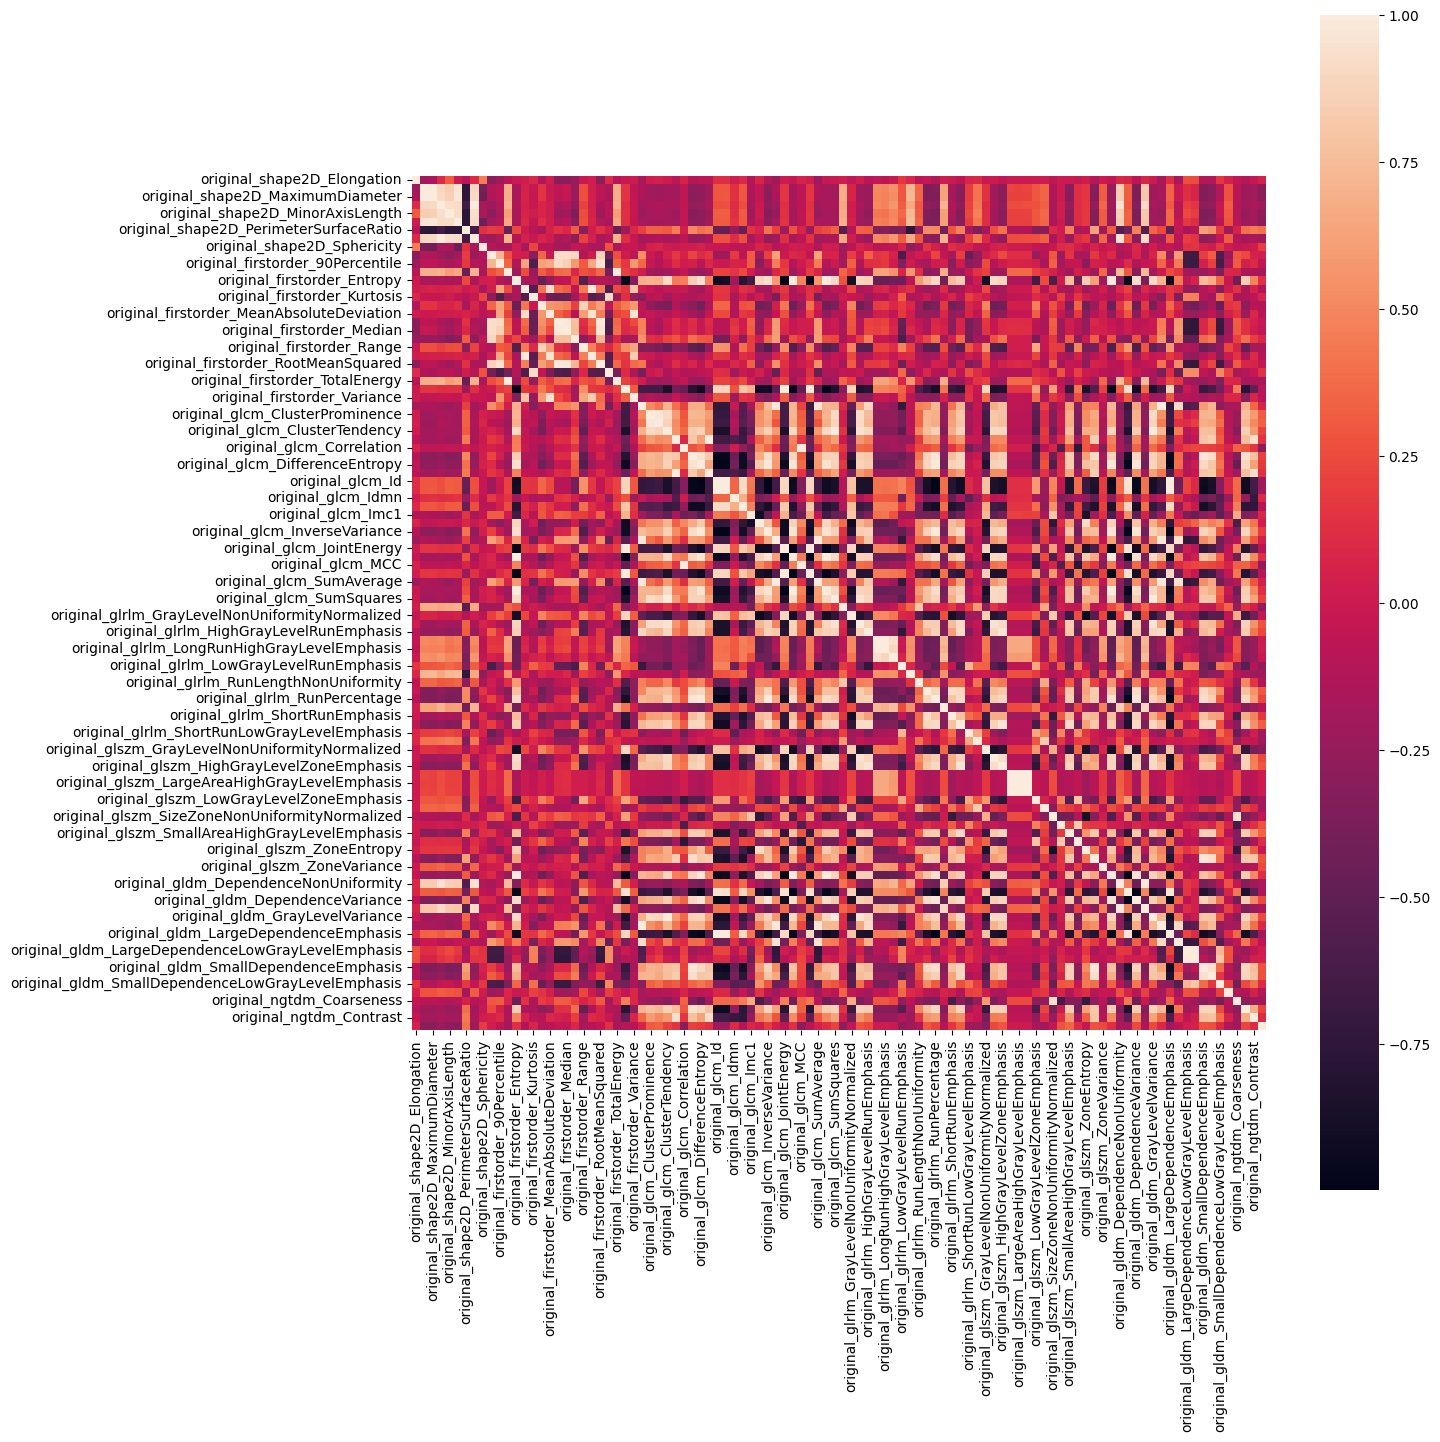

In [16]:
corr = df.iloc[:, 23:].corr()
print(f"Number of features: {df.iloc[:,23:].shape[1]}")
print(corr.shape)

plt.figure(figsize=(15,15))
sns.heatmap(corr, square=True)
plt.tight_layout()
plt.show()

/Users/abby/miniforge3/envs/radiomics/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/abby/miniforge3/envs/radiomics/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


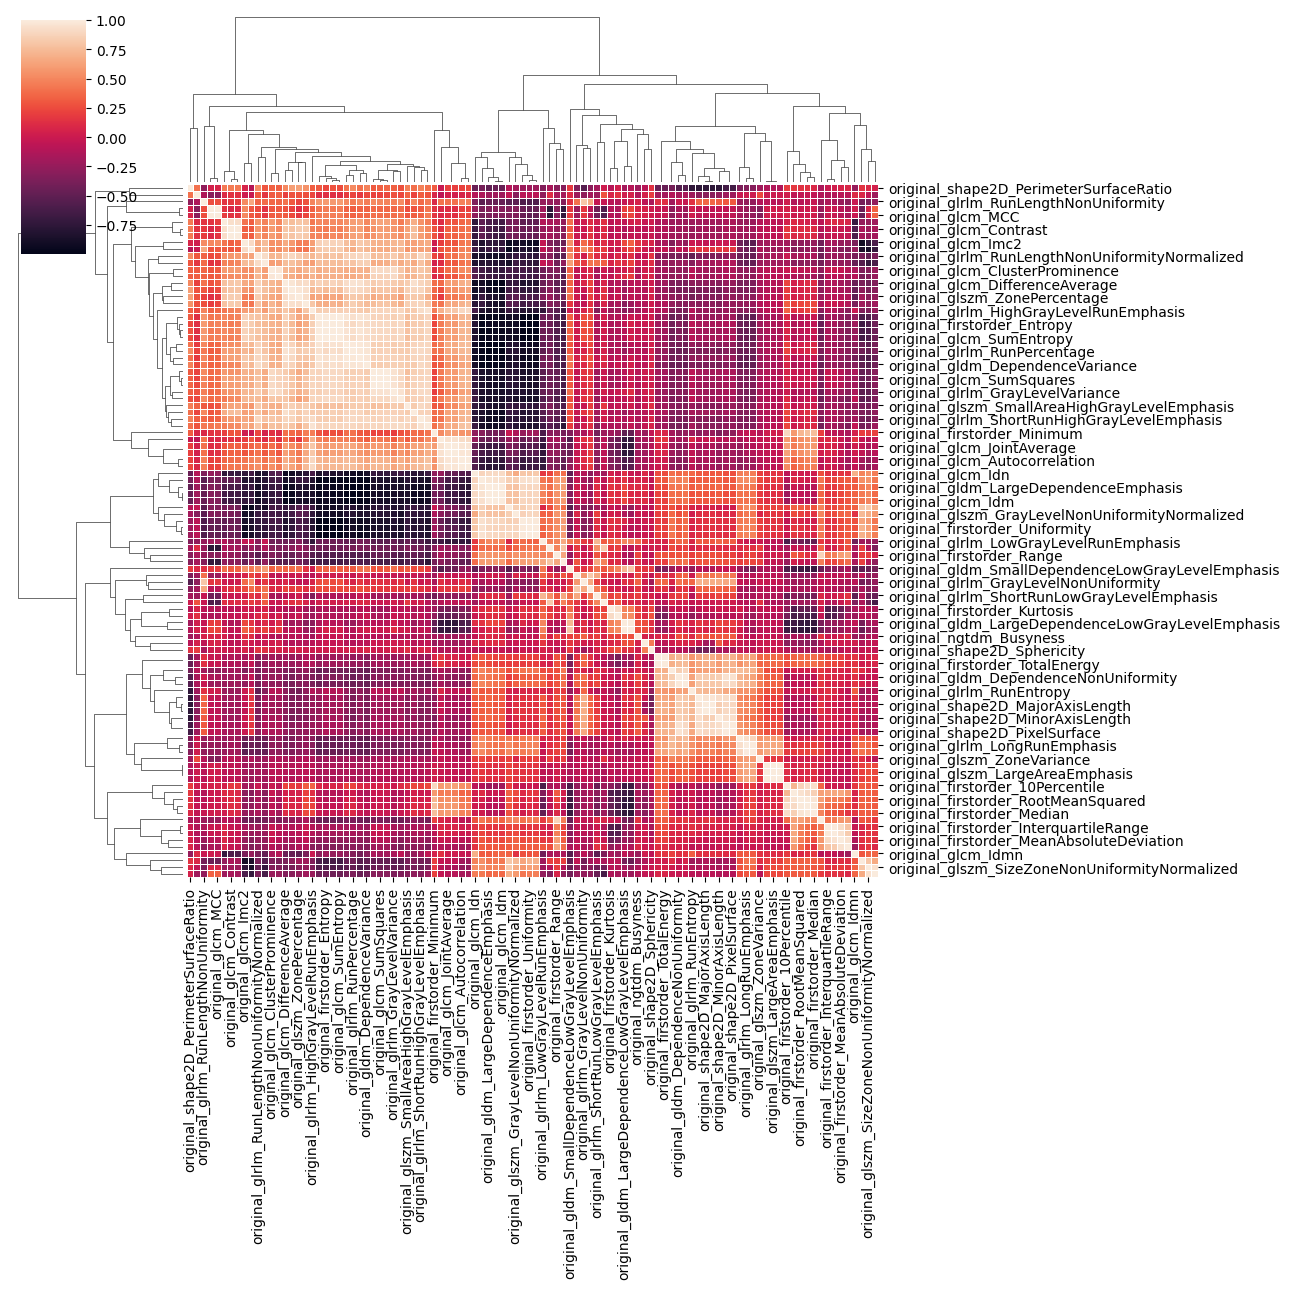

In [5]:
pp = sns.clustermap(corr, linewidths=.5, figsize=(13,13))
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)

plt.show()